In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import jax
import jax.numpy as jnp

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from qdax.core.cmaes import CMAES

In [53]:
# jax.config.update('jax_disable_jit', True)

### Define fitness function

In [54]:
fitness_func = lambda x: -jnp.sum((x - 5.0) * (x - 5.0), axis=-1)

In [73]:
num_iterations = 700 # 70000 #70000 #10000
num_dimensions = 1000 #100 #1000 #@param {type:"integer"} # try 20 and 100
grid_shape = (500, 500) # (500, 500) 
batch_size = 500 #@param {type:"integer"}
sigma_g = 1. # 0.5 #@param {type:"number"}
minval = -5.12
num_best = 250 #36

def rastrigin_scoring(x: jnp.ndarray):
    first_term = 10 * x.shape[-1]
    second_term = jnp.sum((x + minval * 0.4) ** 2 - 10 * jnp.cos(2 * jnp.pi * (x + minval * 0.4)))
    return -(first_term + second_term)
#     return (first_term + second_term)

fitness_func = jax.vmap(rastrigin_scoring)

### Instantiate CMA-ES object

In [74]:
cmaes = CMAES(
    population_size=batch_size,
    num_best=num_best,
    search_dim=num_dimensions, #2, 
    fitness_function=fitness_func,
    mean_init=jnp.zeros((num_dimensions,)), #jnp.asarray([-1.0, -1.0]),
    init_sigma=sigma_g, #1.0,
    init_step_size=0.5, #0.5,
    delay_eigen_decomposition=True, #False,
)

c1:  1.9940994e-06
c cov:  0.00025224264
Eigen decomposition delay:  6219.159


### Initialization

In [66]:
state = cmaes.init()
key = jax.random.PRNGKey(0)

Initial cov:  [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Initial invsqrt cov:  [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [67]:
cmaes._weights

DeviceArray([2.2378536e-02, 1.9570220e-02, 1.7927460e-02, 1.6761903e-02,
             1.5857827e-02, 1.5119144e-02, 1.4494595e-02, 1.3953587e-02,
             1.3476384e-02, 1.3049511e-02, 1.2663358e-02, 1.2310827e-02,
             1.1986531e-02, 1.1686279e-02, 1.1406751e-02, 1.1145271e-02,
             1.0899648e-02, 1.0668068e-02, 1.0449013e-02, 1.0241196e-02,
             1.0043520e-02, 9.8550413e-03, 9.6749440e-03, 9.5025115e-03,
             9.3371188e-03, 9.1782156e-03, 9.0253083e-03, 8.8779628e-03,
             8.7357890e-03, 8.5984357e-03, 8.4655853e-03, 8.3369548e-03,
             8.2122823e-03, 8.0913315e-03, 7.9738880e-03, 7.8597516e-03,
             7.7487431e-03, 7.6406966e-03, 7.5354557e-03, 7.4328789e-03,
             7.3328358e-03, 7.2352039e-03, 7.1398686e-03, 7.0467256e-03,
             6.9556758e-03, 6.8666274e-03, 6.7794942e-03, 6.6941953e-03,
             6.6106548e-03, 6.5288031e-03, 6.4485720e-03, 6.3698990e-03,
             6.2927241e-03, 6.2169922e-03, 6.142649

### Iterations

In [68]:
%%time

means = [state.mean]
covs = [state.cov_matrix]

for _ in range(num_iterations):
    
    samples, key = cmaes.sample(state, key)
#     state = cmaes.update(state, samples)

    fitnesses = -fitness_func(samples)
    idx_sorted = jnp.argsort(fitnesses)
    sorted_candidates = samples[idx_sorted[: num_best]]

    state = cmaes.update_state(state, sorted_candidates)
    
    means.append(state.mean)
    covs.append(state.cov_matrix)

Inv sqrt cov before:  Traced<ShapedArray(float32[100,100])>with<DynamicJaxprTrace(level=0/2)>
Eigen condition's value:  Traced<ShapedArray(bool[])>with<DynamicJaxprTrace(level=0/2)>
Cov:  Traced<ShapedArray(float32[100,100])>with<DynamicJaxprTrace(level=1/2)>
eig:  Traced<ShapedArray(float32[100])>with<DynamicJaxprTrace(level=1/2)>
Inv sqrt cov after:  Traced<ShapedArray(float32[100,100])>with<DynamicJaxprTrace(level=0/2)>
tmp_1:  Traced<ShapedArray(bool[])>with<DynamicJaxprTrace(level=0/2)>
Inv sqrt cov before:  Traced<ShapedArray(float32[100,100])>with<DynamicJaxprTrace(level=0/2)>
Eigen condition's value:  Traced<ShapedArray(bool[])>with<DynamicJaxprTrace(level=0/2)>
Cov:  Traced<ShapedArray(float32[100,100])>with<DynamicJaxprTrace(level=1/2)>
eig:  Traced<ShapedArray(float32[100])>with<DynamicJaxprTrace(level=1/2)>
Inv sqrt cov after:  Traced<ShapedArray(float32[100,100])>with<DynamicJaxprTrace(level=0/2)>
tmp_1:  Traced<ShapedArray(bool[])>with<DynamicJaxprTrace(level=0/2)>
CPU ti

In [69]:
fitnesses

DeviceArray([1095.5945 , 1097.6886 ,  993.47327, 1138.6699 , 1016.9809 ,
             1236.3354 , 1054.6976 ,  999.0755 , 1128.3087 , 1033.2    ,
              981.614  , 1147.9241 , 1111.7809 , 1055.0923 , 1003.3885 ,
              959.37683, 1044.8583 ,  995.3086 , 1113.6893 , 1053.5741 ,
             1195.0022 , 1018.07446, 1142.8467 , 1049.546  , 1103.8927 ,
             1146.2572 , 1183.5533 , 1255.1025 , 1123.2217 , 1039.6633 ,
              988.28186, 1001.1558 , 1156.6433 , 1035.7888 , 1153.743  ,
             1202.8872 , 1130.7334 , 1130.5808 ,  997.0969 , 1111.0873 ,
             1247.75   , 1143.0818 , 1102.0679 , 1180.465  , 1080.001  ,
             1104.3903 , 1049.7167 , 1046.0034 , 1180.5599 , 1105.1819 ,
             1000.7834 , 1016.80255, 1096.3649 , 1086.7792 ,  997.9498 ,
             1160.1841 , 1106.1024 , 1023.1155 , 1111.6499 , 1026.1201 ,
              955.0015 ,  990.63416, 1037.6819 , 1036.9966 , 1037.944  ,
             1010.9297 ,  925.32983, 1143.9977 , 10

In [70]:
worst_objective = rastrigin_scoring(-jnp.ones(num_dimensions) * 5.12)
# worst_objective = rastrigin_scoring(jnp.zeros(num_dimensions))
best_objective = rastrigin_scoring(jnp.ones(num_dimensions) * 5.12 * 0.4)

(fitnesses - worst_objective) * 100 / (best_objective - worst_objective)

DeviceArray([119.40721 , 119.4443  , 117.598236, 120.170235, 118.014656,
             121.90027 , 118.68277 , 117.69748 , 119.986694, 118.301956,
             117.388176, 120.33415 , 119.69392 , 118.68976 , 117.77388 ,
             116.99426 , 118.50848 , 117.63075 , 119.72773 , 118.662865,
             121.16809 , 118.03402 , 120.244225, 118.59151 , 119.55419 ,
             120.30464 , 120.96529 , 122.232704, 119.89659 , 118.41644 ,
             117.50628 , 117.73432 , 120.48862 , 118.347824, 120.43724 ,
             121.30778 , 120.029655, 120.026955, 117.66243 , 119.68164 ,
             122.10246 , 120.24838 , 119.52187 , 120.91058 , 119.13098 ,
             119.563   , 118.59453 , 118.528755, 120.91227 , 119.577034,
             117.72773 , 118.01149 , 119.42085 , 119.25105 , 117.67754 ,
             120.55134 , 119.59334 , 118.12331 , 119.691605, 118.17654 ,
             116.916756, 117.54795 , 118.38135 , 118.36921 , 118.38599 ,
             117.90746 , 116.39116 , 120.2646  , 11

In [71]:
means[-1]

DeviceArray([1.9967493, 1.6599152, 1.67889  , 1.8439345, 2.4741066,
             1.9763321, 2.0960593, 2.0809865, 1.9577546, 2.2050323,
             1.8595723, 2.1930785, 1.748318 , 2.2913094, 1.8871477,
             2.104823 , 1.6885338, 1.732633 , 2.314911 , 2.151892 ,
             1.853884 , 1.7955863, 2.555912 , 2.5247684, 2.6841273,
             2.3024955, 1.723578 , 1.8855038, 2.1905286, 2.3262618,
             1.8010187, 2.1052368, 2.0156662, 1.7819389, 2.3679898,
             1.5672197, 2.6207962, 2.056212 , 2.254635 , 2.212176 ,
             2.8785827, 2.685405 , 1.9655912, 1.4676692, 2.051737 ,
             2.0597825, 2.0355933, 1.8421559, 2.1836247, 2.3747118,
             2.1210165, 2.079783 , 2.0446796, 1.7871687, 1.7357233,
             2.0075655, 2.1408706, 2.4449544, 2.188663 , 2.303256 ,
             2.3592508, 1.9431386, 2.319857 , 2.3647633, 2.0056076,
             2.1900349, 2.2653778, 2.5319772, 2.0144343, 1.8210299,
             1.8834096, 2.2121317, 2.0799017, 1.

### Visualization

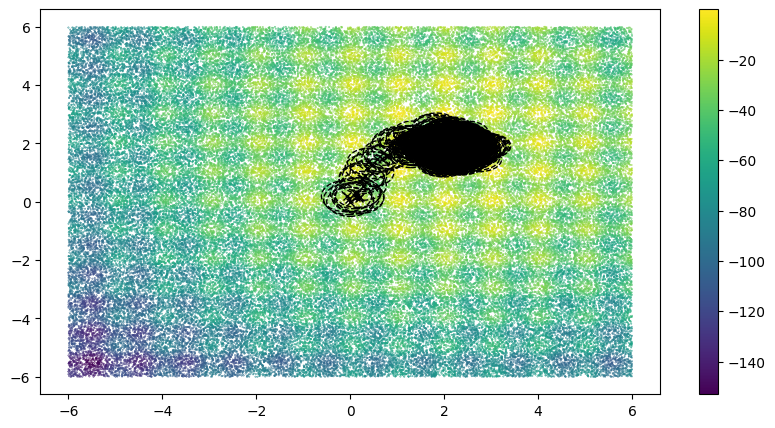

In [72]:
fig, ax = plt.subplots(figsize=(10, 5))

# sample points to show fitness landscape
x = jax.random.uniform(key, minval=-6, maxval=6, shape=(100000, 2))
f_x = fitness_func(x)

# plot fitness landscape
points = ax.scatter(x[:, 0], x[:, 1], c=f_x, s=0.1)
fig.colorbar(points)

# plot cma-es trajectory
for mean, cov in zip(means, covs):
#     print("Mean: ", mean)
#     print("Covariance: ", cov)
#     print("Covariance: ", cov[0])
#     print("Covariance: ", cov[1])
    ellipse = Ellipse((mean[0], mean[1]), cov[0, 0], cov[1, 1], fill=False, color='k', ls='--')
    ax.add_patch(ellipse)
    ax.plot(mean[0], mean[1], color='k', marker='x')

In [17]:
N = 4

pc = jnp.zeros((N,1))
ps = jnp.zeros((N,1))  # evolution paths for C and sigma
B = jnp.eye(N,N)    # B defines the coordinate system
D = jnp.ones((N,1))      # diagonal D defines the scaling
C = B * jnp.diag(D**2) * B.T     # covariance matrix C
invsqrtC = B * jnp.diag(D**(-1)) * B.T

In [18]:
pc

DeviceArray([[0.],
             [0.],
             [0.],
             [0.]], dtype=float32)

In [19]:
ps

DeviceArray([[0.],
             [0.],
             [0.],
             [0.]], dtype=float32)

In [20]:
B

DeviceArray([[1., 0., 0., 0.],
             [0., 1., 0., 0.],
             [0., 0., 1., 0.],
             [0., 0., 0., 1.]], dtype=float32)

In [21]:
D

DeviceArray([[1.],
             [1.],
             [1.],
             [1.]], dtype=float32)

In [20]:
jnp.diag(D)

DeviceArray([1.], dtype=float32)

In [33]:
D**2

DeviceArray([[1.],
             [1.],
             [1.],
             [1.]], dtype=float32)

In [29]:
B * jnp.diag(D**2) * B.T

DeviceArray([[1., 0., 0., 0.],
             [0., 1., 0., 0.],
             [0., 0., 1., 0.],
             [0., 0., 0., 1.]], dtype=float32)

In [30]:
B * jnp.diag(D**(-1)) * B.T

DeviceArray([[1., 0., 0., 0.],
             [0., 1., 0., 0.],
             [0., 0., 1., 0.],
             [0., 0., 0., 1.]], dtype=float32)

In [34]:
C

DeviceArray([[1., 0., 0., 0.],
             [0., 1., 0., 0.],
             [0., 0., 1., 0.],
             [0., 0., 0., 1.]], dtype=float32)

In [35]:
jnp.triu(C)

DeviceArray([[1., 0., 0., 0.],
             [0., 1., 0., 0.],
             [0., 0., 1., 0.],
             [0., 0., 0., 1.]], dtype=float32)

In [39]:
A = jnp.array(
[[1, 2, 3, 4],
 [5, 6, 7, 8],
 [9, 10, 11, 12],
 [13, 14, 15, 16]])

In [40]:
A

DeviceArray([[ 1,  2,  3,  4],
             [ 5,  6,  7,  8],
             [ 9, 10, 11, 12],
             [13, 14, 15, 16]], dtype=int32)

In [41]:
jnp.triu(A)

DeviceArray([[ 1,  2,  3,  4],
             [ 0,  6,  7,  8],
             [ 0,  0, 11, 12],
             [ 0,  0,  0, 16]], dtype=int32)

In [21]:
weights = jnp.array([1, 2, 3, 4, 5])
jnp.diag(weights)

DeviceArray([[1, 0, 0, 0, 0],
             [0, 2, 0, 0, 0],
             [0, 0, 3, 0, 0],
             [0, 0, 0, 4, 0],
             [0, 0, 0, 0, 5]], dtype=int32)